In [1]:
#  Importing required libraries
import numpy as np 
import pandas as pd
import math
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Reading dataset as a dataframe. Can found at (https://www.kaggle.com/datasets/dmi3kno/newcarsalesnorway)
df = pd.read_csv('norway_new_car_sales_by_make.csv')
df

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


In [3]:
# Slicing the dataset and taking the cars or make 'Toyota'.
df2 = df[df['Make']=='Toyota'].drop(columns=('Month'))

In [4]:
# Checking the correlation between features
df2[['Quantity','Pct','Year']].corr()

,Quantity,Pct,Year
Quantity,1.000000,0.678448,-0.040825
Pct,0.678448,1.000000,-0.542104
Year,-0.040825,-0.542104,1.000000


In [5]:
x_train,x_test,y_train,y_test = train_test_split(np.array(df2['Pct']),np.array(df2['Quantity']),test_size=0.25,random_state= 0)

In [6]:
mdl = LinearRegression()

# fit the model with the training data
mdl.fit(x_train.reshape(-1,1), y_train)

# coefficeints of the trained model
print('\nCoefficient of model :', mdl.coef_)

# intercept of the model
print('\nIntercept of model',mdl.intercept_)


Coefficient of model : [85.47064157]

Intercept of model 323.2440384975571


In [7]:
y_pr=mdl.predict(x_test.reshape(-1,1))

In [8]:
error = math.sqrt(mean_squared_error(y_test,y_pr))

In [9]:
error

230.09546414538582

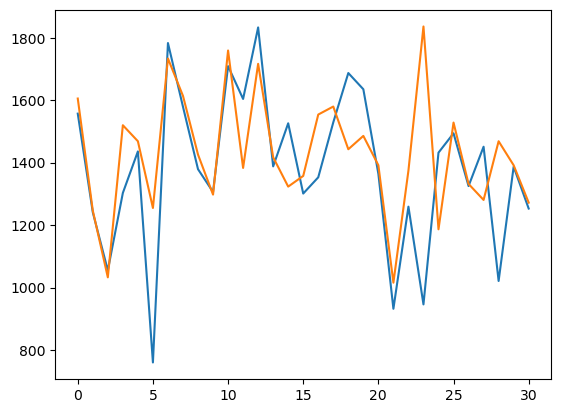

In [21]:
y_axis = np.array([y_test,y_pr])
y_axis = y_axis.transpose()
plt.plot(y_test)
plt.plot(y_pr)
plt.show()

In [2]:
df = pd.read_csv('trimmed_data.csv')
d = np.array(df['Quantity'])